In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
import io
from google.colab import files
uploaded = files.upload()

Saving final2.csv to final2.csv


In [105]:
df = pd.read_csv('final2.csv')
df.head()

,Date,ExternalTemp1,Humidity,Pressure,Temperature
0,8/20/2022 2:03,19.4,81,1008.100,17.9
1,8/20/2022 2:13,19.4,81,1008.001,17.9
2,8/20/2022 2:23,19.3,81,1007.877,17.9
3,8/20/2022 2:33,19.3,81,1007.949,17.8
4,8/20/2022 2:53,19.3,81,1007.808,18.0


In [106]:
df['Date'] = pd.to_datetime(df['Date'])

In [107]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day


In [108]:
df.drop('Date', axis=1, inplace=True)

In [109]:
df

,ExternalTemp1,Humidity,Pressure,Temperature,year,month,day
0,19.4,81,1008.100,17.9,2022,8,20
1,19.4,81,1008.001,17.9,2022,8,20
2,19.3,81,1007.877,17.9,2022,8,20
3,19.3,81,1007.949,17.8,2022,8,20
4,19.3,81,1007.808,18.0,2022,8,20
...,...,...,...,...,...,...,...
29610,0.0,92,993.385,-0.2,2023,3,25
29611,0.0,92,993.471,-0.2,2023,3,25
29612,0.0,92,993.390,-0.2,2023,3,26
29613,0.0,92,993.486,-0.3,2023,3,26


In [110]:
X = df.drop('Temperature', axis=1)
y = df['Temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((23692, 6), (5923, 6), (23692,), (5923,))

# Linear Regression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
lr_pred = lr.predict(X_test)

In [12]:
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

In [13]:
print("Linear Regression R-squared:", lr_r2)
print("Linear Regression MAE:", lr_mae)
print("Linear Regression MSE:", lr_mse)

Linear Regression R-squared: 0.8463638596403958
Linear Regression MAE: 1.9076974615959703
Linear Regression MSE: 6.647814208888232


# decision Tree Regression

In [14]:
dtr = DecisionTreeRegressor(random_state=42)

In [15]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [16]:
dtr_pred = dtr.predict(X_test)

In [17]:
dtr_r2 = r2_score(y_test, dtr_pred)
dtr_mae = mean_absolute_error(y_test, dtr_pred)
dtr_mse = mean_squared_error(y_test, dtr_pred)

In [18]:
print("Decision Tree Regression R-squared:", dtr_r2)
print("Decision Tree Regression MAE:", dtr_mae)
print("Decision Tree Regression MSE:", dtr_mse)

Decision Tree Regression R-squared: 0.9825081124275004
Decision Tree Regression MAE: 0.36667229444538246
Decision Tree Regression MSE: 0.7568715178119196


#Random Forest Regression

In [19]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)


In [20]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
rfr_pred = rfr.predict(X_test)

In [22]:
rfr_r2 = r2_score(y_test, rfr_pred)
rfr_mae = mean_absolute_error(y_test, rfr_pred)
rfr_mse = mean_squared_error(y_test, rfr_pred)

In [23]:
print("Random Forest Regression R-squared:", rfr_r2)
print("Random Forest Regression MAE:", rfr_mae)
print("Random Forest Regression MSE:", rfr_mse)

Random Forest Regression R-squared: 0.9872692184247476
Random Forest Regression MAE: 0.3406016244181278
Random Forest Regression MSE: 0.5508591302028553


#support vector machine

In [24]:
svr = SVR(kernel='rbf')


In [25]:
svr.fit(X_train, y_train)

SVR()

In [26]:
svr_pred = svr.predict(X_test)

In [27]:
svr_r2 = r2_score(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

In [28]:
print("Support Vector Regression R-squared:", svr_r2)
print("Support Vector Regression MAE:", svr_mae)
print("Support Vector Regression MSE:", svr_mse)

Support Vector Regression R-squared: 0.15658602589409143
Support Vector Regression MAE: 4.832415035063961
Support Vector Regression MSE: 36.494404167617134


# multi layer perceptron regression

In [29]:
mlp = MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=1000)

In [30]:
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=1000)

In [31]:
mlp_pred = mlp.predict(X_test)

In [32]:
mlp_r2 = r2_score(y_test, mlp_pred)
mlp_mae = mean_absolute_error(y_test, mlp_pred)
mlp_mse = mean_squared_error(y_test, mlp_pred)

In [33]:
print("Multi-layer Perceptron Regression R-squared:", mlp_r2)
print("Multi-layer Perceptron Regression MAE:", mlp_mae)
print("Multi-layer Perceptron Regression MSE:", mlp_mse)

Multi-layer Perceptron Regression R-squared: 0.8442032253930988
Multi-layer Perceptron Regression MAE: 1.924727372051374
Multi-layer Perceptron Regression MSE: 6.741304549219436


In [34]:
metrics = {'Linear Regression': [lr_r2, lr_mae, lr_mse],
           'Decision Tree Regression': [dtr_r2, dtr_mae, dtr_mse],
           'Random Forest Regression': [rfr_r2, rfr_mae, rfr_mse],
           'Support Vector Regression': [svr_r2, svr_mae, svr_mse],
           'Multi-layer Perceptron Regression': [mlp_r2, mlp_mae, mlp_mse]}

In [35]:
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['R-squared', 'MAE', 'MSE'])

In [36]:
print(metrics_df)

                                   R-squared       MAE        MSE
Linear Regression                   0.846364  1.907697   6.647814
Decision Tree Regression            0.982508  0.366672   0.756872
Random Forest Regression            0.987269  0.340602   0.550859
Support Vector Regression           0.156586  4.832415  36.494404
Multi-layer Perceptron Regression   0.844203  1.924727   6.741305


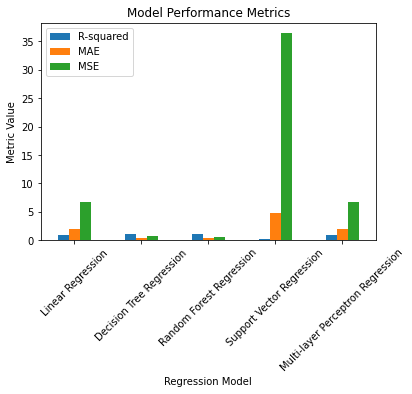

In [37]:
import matplotlib.pyplot as plt
LST
# create a bar chart of the model performance metrics
metrics_df.plot(kind='bar', rot=45)
plt.title('Model Performance Metrics')
plt.xlabel('Regression Model')
plt.ylabel('Metric Value')
plt.show()

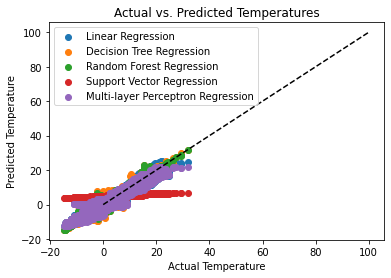

In [38]:
plt.scatter(y_test, lr_pred, label='Linear Regression')
plt.scatter(y_test, dtr_pred, label='Decision Tree Regression')
plt.scatter(y_test, rfr_pred, label='Random Forest Regression')
plt.scatter(y_test, svr_pred, label='Support Vector Regression')
plt.scatter(y_test, mlp_pred, label='Multi-layer Perceptron Regression')
plt.plot([0, 100], [0, 100], 'k--')
plt.title('Actual vs. Predicted Temperatures')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.legend()
plt.show()

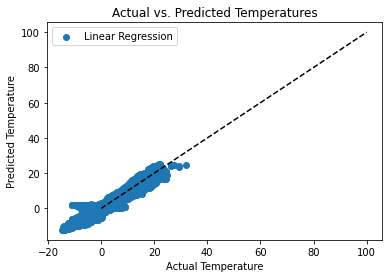

In [39]:
plt.scatter(y_test, lr_pred, label='Linear Regression')

plt.plot([0, 100], [0, 100], 'k--')
plt.title('Actual vs. Predicted Temperatures')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.legend()
plt.show()

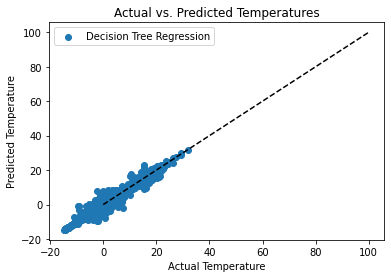

In [40]:

plt.scatter(y_test, dtr_pred, label='Decision Tree Regression')

plt.plot([0, 100], [0, 100], 'k--')
plt.title('Actual vs. Predicted Temperatures')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.legend()
plt.show()

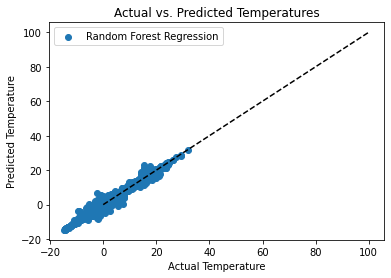

In [41]:

plt.scatter(y_test, rfr_pred, label='Random Forest Regression')

plt.plot([0, 100], [0, 100], 'k--')
plt.title('Actual vs. Predicted Temperatures')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.legend()
plt.show()